In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd

df = pd.read_csv('/content/cs-training.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df.isnull().sum()
df.fillna(df.median(), inplace=True)

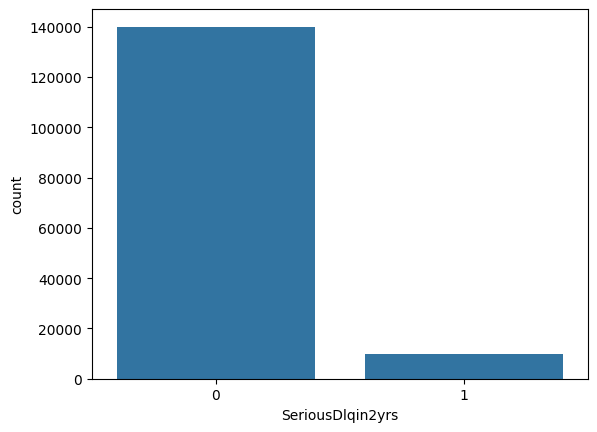

In [6]:
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.show()

In [7]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [8]:
df = df.drop("Unnamed: 0", axis=1)

df["MonthlyIncome"].fillna(df["MonthlyIncome"].median(), inplace=True)
df["NumberOfDependents"].fillna(df["NumberOfDependents"].median(), inplace=True)

/tmp/ipython-input-2548834323.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MonthlyIncome"].fillna(df["MonthlyIncome"].median(), inplace=True)
/tmp/ipython-input-2548834323.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9344666666666667

In [10]:
df.isnull().sum()

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


In [11]:
df["SeriousDlqin2yrs"].value_counts()


,count
SeriousDlqin2yrs,
0,139974
1,10026


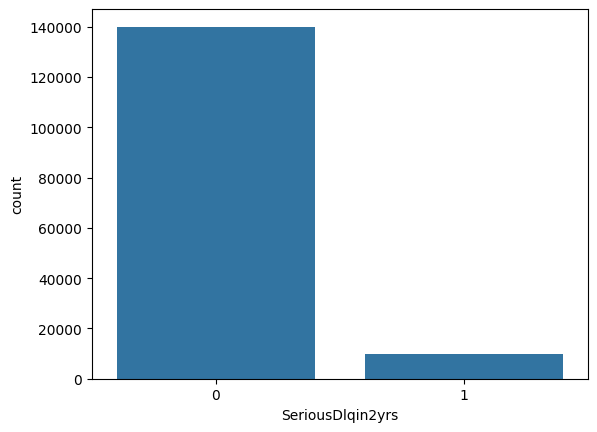

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="SeriousDlqin2yrs", data=df)
plt.show()

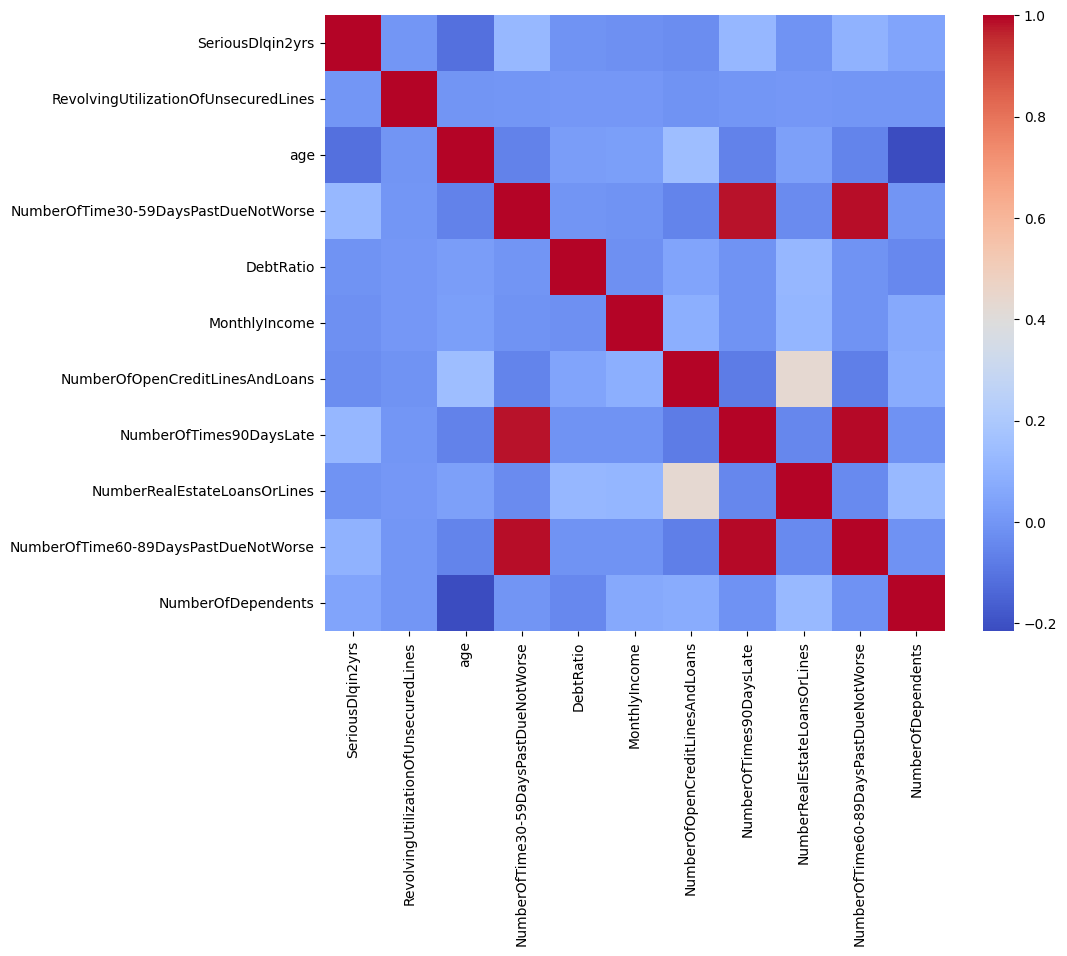

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

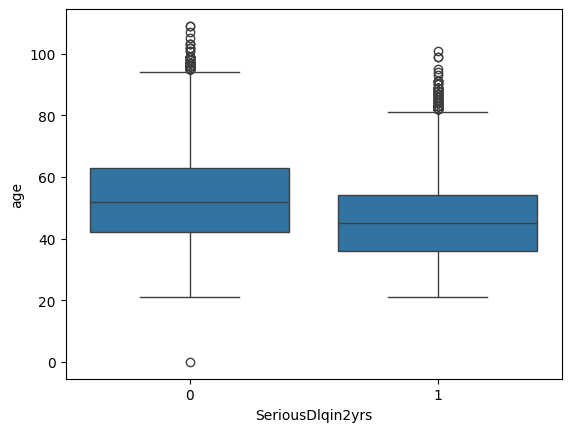

In [14]:
sns.boxplot(x="SeriousDlqin2yrs", y="age", data=df)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop("SeriousDlqin2yrs", axis=1)
y = df["SeriousDlqin2yrs"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.52      0.04      0.07      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.52      0.52     30000
weighted avg       0.91      0.94      0.91     30000



In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.55      0.20      0.29      1956

    accuracy                           0.94     30000
   macro avg       0.75      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



In [19]:
!pip install imbalanced-learn

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

rf.fit(X_res, y_res)
y_pred_smote = rf.predict(X_test)

print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     28044
           1       0.35      0.35      0.35      1956

    accuracy                           0.91     30000
   macro avg       0.65      0.65      0.65     30000
weighted avg       0.92      0.91      0.91     30000



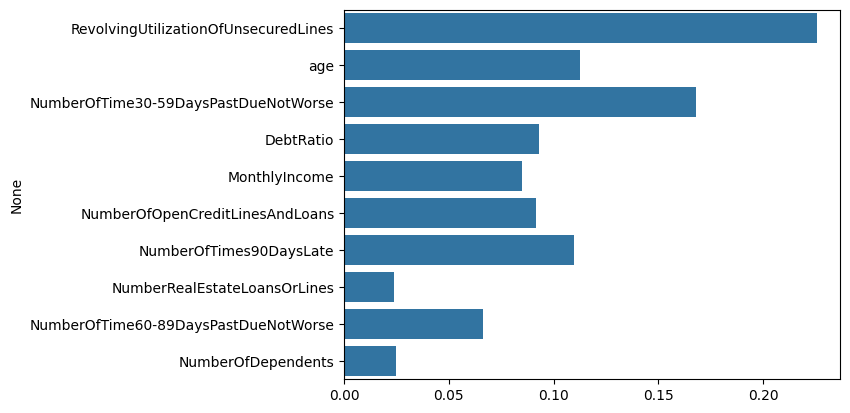

In [21]:
importances = rf.feature_importances_
features = df.drop("SeriousDlqin2yrs", axis=1).columns

sns.barplot(x=importances, y=features)
plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

[[27355   689]
 [ 1907    49]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     28044
           1       0.07      0.03      0.04      1956

    accuracy                           0.91     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.88      0.91      0.89     30000



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ROC AUC Score: 0.634675317766793


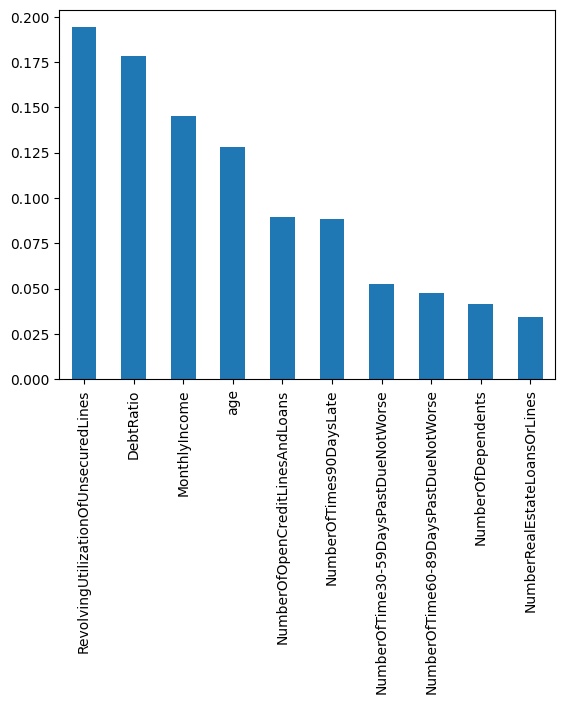

In [23]:
import pandas as pd

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [24]:
import joblib
joblib.dump(model, 'credit_risk_model.pkl')

['credit_risk_model.pkl']

In [25]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

XGBoost Accuracy: 0.9361
